<h1><center>Purdue Physics 580</center></h1>
<h3><center>Computational Physics - Giordano & Nakanishi</center></h3>
<br></br>
<h3><center>Chapter 1</center></h3>
<br></br>
<center>Ethan Knox</center>
<center>ethank5149@gmail.com</center>
<center>www.github.com/ethank5149</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

## Exercise 1

The velocity of a freely falling object near Earth's surface is described by the equation

$$\frac{dv}{dt}=-g$$

where $v$ is the velocity and $g = 9.8 m/s^2$ is the acceleration due to gravity. Write a program that employs the Euler method to compute the solution to (1.8); that is, calculate $v$ as a function of $t$. For simplicity, assume that the initial velocity is zero—that is, the object starts from rest—and calculate the solution for times $t = 0$ to $t = 10$ s. Repeat the calculation for several different values of the time step, and compare the results with the exact solution to (1.8). It turns out that for this case the Euler method gives the exact result. Verify this with your numerical results and prove it analytically.


In [2]:
def get_data(dt,t_final,dx0,dy0):
    try:
        data = np.genfromtxt(f"data/exercise1_1_dt={dt}_tf={t_final}_dx0={int(dx0)}_dy0={int(dy0)}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_1.exe':")
        print(f"{dt} {t_final} {int(dx0)} {int(dy0)}")
        return None

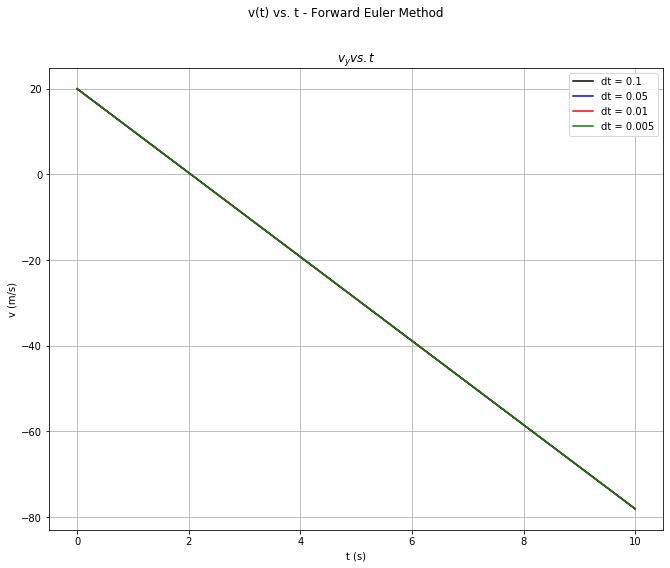

In [4]:
data1 = get_data(0.1,10,100,20)
data2 = get_data(0.05,10,100,20)
data3 = get_data(0.01,10,100,20)
data4 = get_data(0.005,10,100,20)

t1,dx1,dy1 = [np.array(data1[:,s]) for s in range(3)]
t2,dx2,dy2 = [np.array(data2[:,s]) for s in range(3)]
t3,dx3,dy3 = [np.array(data3[:,s]) for s in range(3)]
t4,dx4,dy4 = [np.array(data4[:,s]) for s in range(3)]

# Plotting
###############################################################################
fig, ax = plt.subplots(1,1,figsize=(11,8.5))
fig.suptitle("v(t) vs. t - Forward Euler Method")
# 
ax.set_title(r"$v_y vs. t$")
ax.set_xlabel("t (s)")
ax.set_ylabel(r"v (m/s)")
ax.plot(t1,dy1,c="k",linestyle="-",label='dt = 0.1')
ax.plot(t2,dy2,c="b",linestyle="-",label='dt = 0.05')
ax.plot(t3,dy3,c="r",linestyle="-",label='dt = 0.01')
ax.plot(t4,dy4,c="g",linestyle="-",label='dt = 0.005')
ax.legend()
ax.grid()
plt.show()
###############################################################################

## Exercise 2

The position of an object moving horizontally with a constant velocity, $v$, is 
described by the equation 

$$\frac{dx}{dt}=v.$$

Assuming that the velocity is a constant, say $v = 40 m/s$, use the Euler method to solve (1.9) for $x$ as a function of time. Compare your result with the exact solution.

In [8]:
def get_data(dt,t_final,x0,y0):
    try:
        data = np.genfromtxt(f"data/exercise1_2_dt={dt}_tf={t_final}_x0={int(x0)}_y0={int(y0)}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_2.exe':")
        print(f"{dt} {t_final} {int(x0)} {int(y0)}")
        return None

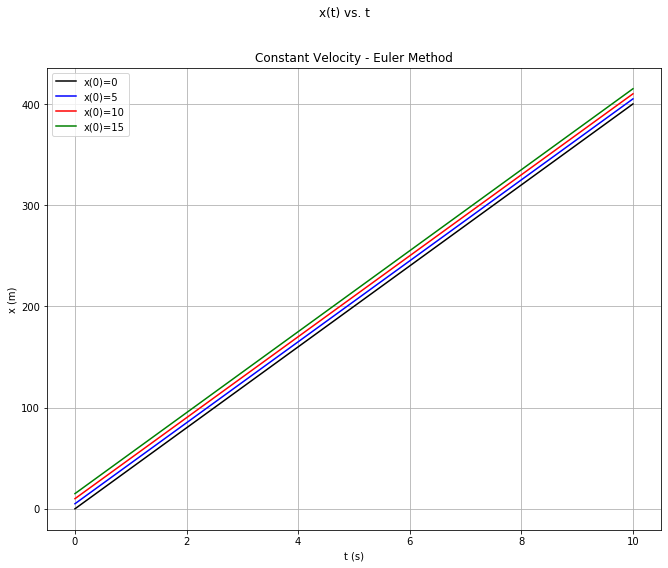

In [9]:
data1 = get_data(0.01,10,0,20)
data2 = get_data(0.01,10,5,20)
data3 = get_data(0.01,10,10,20)
data4 = get_data(0.01,10,15,20)

t1,x1,y1 = [np.array(data1[:,s]) for s in range(3)]
t2,x2,y2 = [np.array(data2[:,s]) for s in range(3)]
t3,x3,y3 = [np.array(data3[:,s]) for s in range(3)]
t4,x4,y4 = [np.array(data4[:,s]) for s in range(3)]
# 
# Plotting
###############################################################################
fig, ax = plt.subplots(1,1,figsize=(11,8.5))
fig.suptitle("x(t) vs. t")

# Plot theta vs. t
ax.set_title("Constant Velocity - Euler Method")
ax.set_xlabel("t (s)")
ax.set_ylabel(r"x (m)")
ax.plot(t1,x1,c="k",linestyle="-",label='x(0)=0')
ax.plot(t2,x2,c="b",linestyle="-",label='x(0)=5')
ax.plot(t3,x3,c="r",linestyle="-",label='x(0)=10')
ax.plot(t4,x4,c="g",linestyle="-",label='x(0)=15')
ax.legend()
ax.grid()
plt.show()
###############################################################################

## Exercise 3

It is often the case that the frictional force on an object will increase as the object moves faster. A fortunate example of this is a parachutist; the role of the parachute is to produce a frictional force due to air drag, which is larger than would normally be the case without the parachute. The physics of air drag will be discussed in more detail in the next chapter. Here we consider a very simple example in which the frictional force depends on the velocity. Assume that the velocity of an object obeys an equation of the form 

$$\frac{dv}{dt}=a-bv,$$

where $a$ and $b$ are constants. You could think of $a$ as coming from an applied force, such as gravity, while $b$ arises from friction. Note that the frictional force is negative (we assume that $b > 0$), so that it opposes the motion, and that it increases in magnitude as the velocity increases. Use the Euler method to solve (1.10) for $v$ as a function of time. A convenient choice of parameters is $a = 10$ and $b = 1$. You should find that $v$ approaches a constant value at long times; this is called the terminal velocity.

Analytic Treatment:

$$m\ddot{x}=-b\left|v\right|\cdot\frac{\dot{x}}{\left|v\right|}\rightarrow \ddot{x}=-\frac{b}{m}\dot{x}$$
$$m\ddot{y}=-g-b\left|v\right|\cdot\frac{\dot{y}}{\left|v\right|}\rightarrow \ddot{y}=-g-\frac{b}{m}\dot{y}$$

$\ddot{x}+\frac{b}{m}\dot{x}=0\mid\left\{x\left(0\right)=x_0,\,\,\dot{x}\left(0\right)=\dot{x}_0\right\}:$
$$x\left(t\right)=c_1+c_2e^{-\frac{b}{m}t}\rightarrow \fbox{$x\left(t\right)=x_0+\frac{m}{b}\dot{x}_0\left(1-e^{-\frac{b}{m}t}\right)$}$$
$$\therefore\fbox{$\dot{x}\left(t\right)=\dot{x}_0e^{-\frac{b}{m}t}$}$$

$\ddot{y}+\frac{b}{m}\dot{y}+g=0\mid\left\{y\left(0\right)=y_0,\,\,\dot{y}\left(0\right)=\dot{y}_0\right\}:$
$$y\left(t\right)=c_1e^{\frac{1}{2}\left(-\sqrt{\left(\frac{b}{m}\right)^2-4g}-\frac{b}{m}\right)t}+c_2e^{\frac{1}{2}\left(\sqrt{\left(\frac{b}{m}\right)^2-4g}-\frac{b}{m}\right)t}\rightarrow$$
$$\fbox{$y\left(t\right)=y_0+\frac{m}{b}\left(\left(\frac{mg}{b}+\dot{y}_0\right)\left(1-e^{-\frac{b}{m}t}\right)-gt\right)$}$$
$$\therefore\fbox{$\dot{y}\left(t\right)=\frac{mg}{b}\left(\left(1+\frac{b}{mg}\dot{y}_0\right)e^{-\frac{b}{m}t}-1\right)$}$$

In [18]:
def get_data(m,b,dt,t_final,x0,y0,dx0,dy0):
    try:
        data = np.genfromtxt(f"data/exercise1_3_m={m}_b={b}_dt={dt}_tf={t_final}_x0={int(x0)}_y0={int(y0)}_dx0={int(dx0)}_dy0={int(dy0)}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_3.exe':")
        print(f"{m} {b} {dt} {t_final} {int(x0)} {int(y0)} {int(dx0)} {int(dy0)}")
        return None

In [19]:
b = 1
m = 1
x0 = 0
y0 = 1000
dx0 = 20
dy0 = 20
t_final = 10
g = 9.81

In [20]:
def x_a(t):
    return x0+(m/b)*dx0*(1-np.exp(-(b/m)*t))

In [21]:
def dx_a(t):
    return dx0*np.exp(-(b/m)*t)

In [22]:
def y_a(t):
    return y0+(m/b)*((m*g/b+dy0)*(1-np.exp(-(b/m)*t))-g*t)

In [23]:
def dy_a(t):
    return (m*g/b+dy0)*np.exp(-(b/m)*t)-(m/b)*g

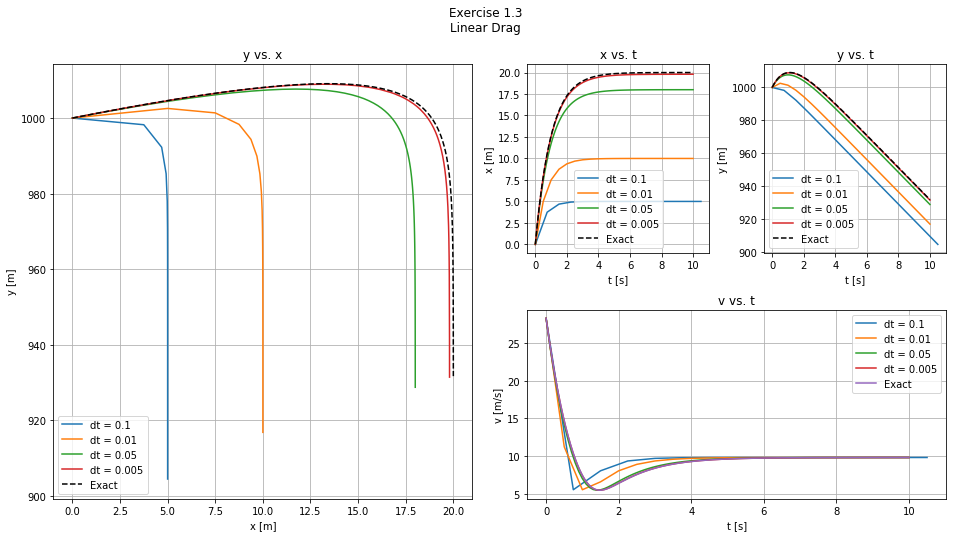

In [24]:
t = np.linspace(0,t_final,round(t_final/0.001))

data1 = get_data(m,b,0.75,t_final,x0,y0,dx0,dy0)
data2 = get_data(m,b,0.5,t_final,x0,y0,dx0,dy0)
data3 = get_data(m,b,0.1,t_final,x0,y0,dx0,dy0)
data4 = get_data(m,b,0.01,t_final,x0,y0,dx0,dy0)

t1,x1,y1,dx1,dy1 = [np.array(data1[:,s]) for s in range(5)]
t2,x2,y2,dx2,dy2 = [np.array(data2[:,s]) for s in range(5)]
t3,x3,y3,dx3,dy3 = [np.array(data3[:,s]) for s in range(5)]
t4,x4,y4,dx4,dy4 = [np.array(data4[:,s]) for s in range(5)]

# Plotting
###############################################################################
fig = plt.figure(figsize=(16,8))
fig.suptitle("Exercise 1.3\nLinear Drag")

ax1 = plt.subplot2grid((2,4),(0,0),rowspan=2,colspan=2)
ax2 = plt.subplot2grid((2,4),(0,2))
ax3 = plt.subplot2grid((2,4),(0,3))
ax4 = plt.subplot2grid((2,4),(1,2),colspan=2)

ax2.set_title("x vs. t")
ax2.set_xlabel("t [s]")
ax2.set_ylabel(r"x [m]")
ax2.plot(t1,x1,linestyle="-",label='dt = 0.1')
ax2.plot(t2,x2,linestyle="-",label='dt = 0.01')
ax2.plot(t3,x3,linestyle="-",label='dt = 0.05')
ax2.plot(t4,x4,linestyle="-",label='dt = 0.005')
ax2.plot(t,x_a(t),c="k",linestyle="--",label='Exact')
ax2.legend()
ax2.grid()

ax3.set_title("y vs. t")
ax3.set_xlabel("t [s]")
ax3.set_ylabel(r"y [m]")
ax3.plot(t1,y1,linestyle="-",label='dt = 0.1')
ax3.plot(t2,y2,linestyle="-",label='dt = 0.01')
ax3.plot(t3,y3,linestyle="-",label='dt = 0.05')
ax3.plot(t4,y4,linestyle="-",label='dt = 0.005')
ax3.plot(t,y_a(t),c="k",linestyle="--",label='Exact')
ax3.legend()
ax3.grid()

ax1.set_title("y vs. x")
ax1.set_xlabel("x [m]")
ax1.set_ylabel(r"y [m]")
ax1.plot(x1,y1,linestyle="-",label='dt = 0.1')
ax1.plot(x2,y2,linestyle="-",label='dt = 0.01')
ax1.plot(x3,y3,linestyle="-",label='dt = 0.05')
ax1.plot(x4,y4,linestyle="-",label='dt = 0.005')
ax1.plot(x_a(t),y_a(t),c="k",linestyle="--",label='Exact')
ax1.legend()
ax1.grid()

ax4.set_title("v vs. t")
ax4.set_xlabel("t [s]")
ax4.set_ylabel(r"v [m/s]")
ax4.plot(t1,np.sqrt(dx1**2+dy1**2),linestyle="-",label='dt = 0.1')
ax4.plot(t2,np.sqrt(dx2**2+dy2**2),linestyle="-",label='dt = 0.01')
ax4.plot(t3,np.sqrt(dx3**2+dy3**2),linestyle="-",label='dt = 0.05')
ax4.plot(t4,np.sqrt(dx4**2+dy4**2),linestyle="-",label='dt = 0.005')
ax4.plot(t,np.sqrt(dx_a(t)**2+dy_a(t)**2),linestyle="-",label='Exact')
ax4.legend()
ax4.grid()

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
###############################################################################

## Exercise 4

Consider a radioactive decay problem involving two types of nuclei, $A$ and $B$, with populations $N_A(T)$ and $N_B(t)$. Suppose that type $A$ nuclei decay to form type $B$ nuclei, which then also decay, according to the differential equations 

$$\frac{dN_A}{dt}=-\frac{N_A}{\tau_A},$$
$$\frac{dN_B}{dt}=\frac{N_A}{\tau_A}-\frac{N_B}{\tau_B},$$

where $\tau_A$ and $\tau_B$ are the decay time constants for each type of nucleus. Use the Euler method to solve these coupled equations for $N_A$ and $N_B$ as functions of time. This problem can also be solved exactly, as was the case with our original nuclear decay problem (1.1). Obtain the analytical solutions for $N_A(t)$ and $N_B(t)$, and compate them with your numerical results. It is also interesting to explore the behavior found for different values of the ratio $\tau_A/\tau_B$. In particular, try to interpret the short and long time behaviors for different values of the ratio.

In [28]:
def get_data(t_A,t_B,A_0,B_0,dt,t_final):
    try:
        data = np.genfromtxt(f"data/exercise1_4_tA={t_A}_tB={t_B}_dt={dt}_tf={t_final}_A0={A_0}_B0={B_0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_4.exe':")
        print(f"{t_A} {t_B} {dt} {t_final} {A_0} {B_0}")
        return None

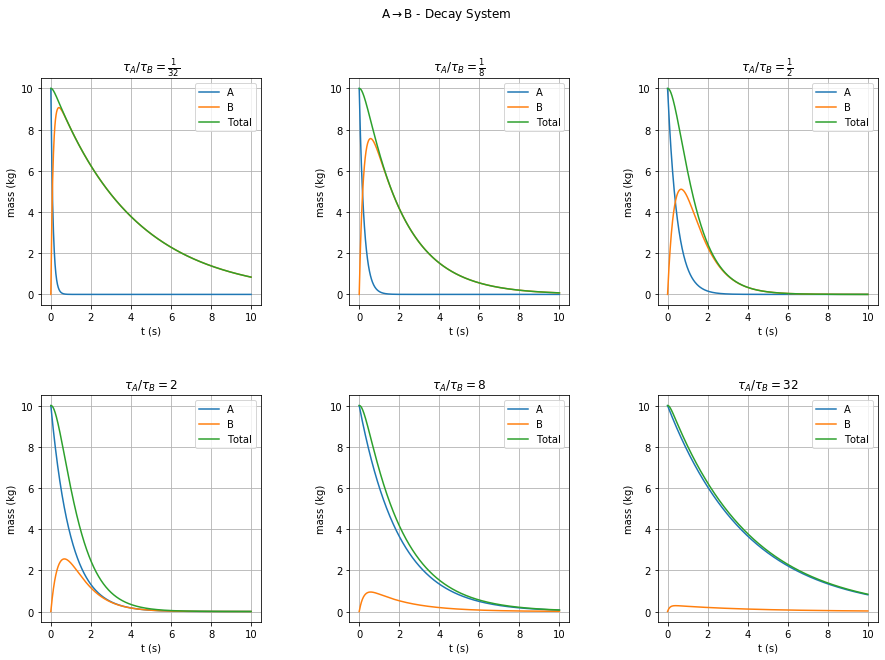

In [29]:
# Constants/Parameters
###############################################################################
t_As = [0.125,0.25,0.5,1,2,4]
t_Bs = [4,2,1,0.5,0.25,0.125]
dt = 0.01
Na0,Nb0 = 10,0
t_final=10
###############################################################################

t = np.linspace(0,t_final,round(t_final/0.001))

data1 = get_data(t_As[0],t_Bs[0],Na0,Nb0,dt,t_final)
data2 = get_data(t_As[1],t_Bs[1],Na0,Nb0,dt,t_final)
data3 = get_data(t_As[2],t_Bs[2],Na0,Nb0,dt,t_final)
data4 = get_data(t_As[3],t_Bs[3],Na0,Nb0,dt,t_final)
data5 = get_data(t_As[4],t_Bs[4],Na0,Nb0,dt,t_final)
data6 = get_data(t_As[5],t_Bs[5],Na0,Nb0,dt,t_final)

t1,A1,B1,dA1,dB1 = [np.array(data1[:,s]) for s in range(5)]
t2,A2,B2,dA2,dB2 = [np.array(data2[:,s]) for s in range(5)]
t3,A3,B3,dA3,dB3 = [np.array(data3[:,s]) for s in range(5)]
t4,A4,B4,dA4,dB4 = [np.array(data4[:,s]) for s in range(5)]
t5,A5,B5,dA5,dB5 = [np.array(data5[:,s]) for s in range(5)]
t6,A6,B6,dA6,dB6 = [np.array(data6[:,s]) for s in range(5)]

# Plotting
###############################################################################
fig, ax = plt.subplots(2,3,figsize=(15,10))
fig.suptitle(r"A$\rightarrow$B - Decay System")

ax[0,0].set_title(r'''$\tau_A/\tau_B = \frac{1}{32}$''')
ax[0,0].set_xlabel("t (s)")
ax[0,0].set_ylabel(r"mass (kg)")
ax[0,0].plot(t1,A1,linestyle="-",label='A')
ax[0,0].plot(t1,B1,linestyle="-",label='B')
ax[0,0].plot(t1,A1+B1,linestyle="-",label='Total')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].set_title(r'''$\tau_A/\tau_B = \frac{1}{8}$''')
ax[0,1].set_xlabel("t (s)")
ax[0,1].set_ylabel(r"mass (kg)")
ax[0,1].plot(t2,A2,linestyle="-",label='A')
ax[0,1].plot(t2,B2,linestyle="-",label='B')
ax[0,1].plot(t2,A2+B2,linestyle="-",label='Total')
ax[0,1].legend()
ax[0,1].grid()

ax[0,2].set_title(r'''$\tau_A/\tau_B = \frac{1}{2}$''')
ax[0,2].set_xlabel("t (s)")
ax[0,2].set_ylabel(r"mass (kg)")
ax[0,2].plot(t3,A3,linestyle="-",label='A')
ax[0,2].plot(t3,B3,linestyle="-",label='B')
ax[0,2].plot(t3,A3+B3,linestyle="-",label='Total')
ax[0,2].legend()
ax[0,2].grid()

ax[1,0].set_title(r'''$\tau_A/\tau_B = 2$''')
ax[1,0].set_xlabel("t (s)")
ax[1,0].set_ylabel(r"mass (kg)")
ax[1,0].plot(t4,A4,linestyle="-",label='A')
ax[1,0].plot(t4,B4,linestyle="-",label='B')
ax[1,0].plot(t4,A4+B4,linestyle="-",label='Total')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].set_title(r'''$\tau_A/\tau_B = 8$''')
ax[1,1].set_xlabel("t (s)")
ax[1,1].set_ylabel(r"mass (kg)")
ax[1,1].plot(t5,A5,linestyle="-",label='A')
ax[1,1].plot(t5,B5,linestyle="-",label='B')
ax[1,1].plot(t5,A5+B5,linestyle="-",label='Total')
ax[1,1].legend()
ax[1,1].grid()

ax[1,2].set_title(r'''$\tau_A/\tau_B = 32$''')
ax[1,2].set_xlabel("t (s)")
ax[1,2].set_ylabel(r"mass (kg)")
ax[1,2].plot(t6,A6,linestyle="-",label='A')
ax[1,2].plot(t6,B6,linestyle="-",label='B')
ax[1,2].plot(t6,A6+B6,linestyle="-",label='Total')
ax[1,2].legend()
ax[1,2].grid()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
###############################################################################

## Exercise 5

Consider again a decay problem with two types of nuclei $A$ and $B$, but now suppose that nuclei of type $A$ decay into ones of type $B$, while nuclei of type $B$ decay into ones of type $A$. Strictly speaking, this is not a "decay" process, since it is possible for the type $B$ nuclei to turn back into type $A$ nuclei. A better analogy would be a resonance in which a system can tunnel or move back and forth between two states $A$ and $B$ which have equal energies. The corresponding rate equations are 

$$\frac{dN_A}{dt}=\frac{N_B}{\tau}-\frac{N_A}{\tau},$$
$$\frac{dN_B}{dt}=\frac{N_A}{\tau}-\frac{N_B}{\tau},$$

where for simplicity we have assumed that the two types of decay are characterized by the same time constant, $\tau$. Solve this system of equations for the numbers of nuclei, $N_A$ and $N_B$, as functions of time. Consider different initial conditions, such as $N_A = 100,\, N_B = 0$, etc., and take $t = 1 s$. Show that your numerical results are consistent with the idea that the system reaches a steady state in which $N_A$ and $N_B$ are constant. In such a steady state, the time derivatives $\frac{dN_A}{dt}$ and $\frac{dN_B}{dt}$ should vanish.

In [30]:
def get_data(t_A,t_B,A_0,B_0,dt,t_final):
    try:
        data = np.genfromtxt(f"data/exercise1_5_tA={t_A}_tB={t_B}_dt={dt}_tf={t_final}_A0={A_0}_B0={B_0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_5.exe':")
        print(f"{t_A} {t_B} {dt} {t_final} {A_0} {B_0}")
        return None

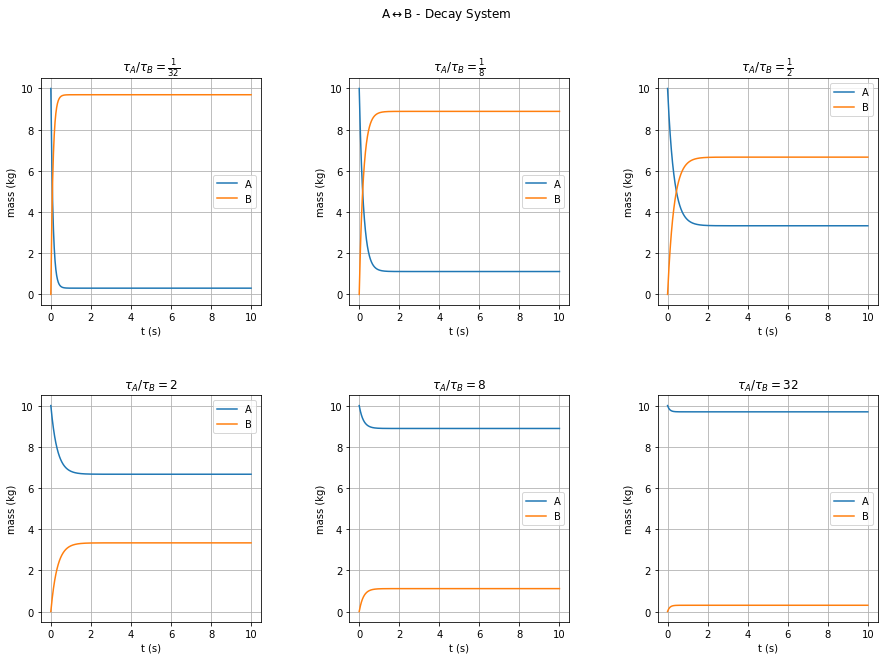

In [32]:
# Constants/Parameters
###############################################################################
t_As = [0.125,0.25,0.5,1,2,4]
t_Bs = [4,2,1,0.5,0.25,0.125]
dt = 0.01
Na0,Nb0 = 10,0
t_final=10
###############################################################################

t = np.linspace(0,t_final,round(t_final/0.001))

data1 = get_data(t_As[0],t_Bs[0],Na0,Nb0,dt,t_final)
data2 = get_data(t_As[1],t_Bs[1],Na0,Nb0,dt,t_final)
data3 = get_data(t_As[2],t_Bs[2],Na0,Nb0,dt,t_final)
data4 = get_data(t_As[3],t_Bs[3],Na0,Nb0,dt,t_final)
data5 = get_data(t_As[4],t_Bs[4],Na0,Nb0,dt,t_final)
data6 = get_data(t_As[5],t_Bs[5],Na0,Nb0,dt,t_final)

t1,A1,B1,dA1,dB1 = [np.array(data1[:,s]) for s in range(5)]
t2,A2,B2,dA2,dB2 = [np.array(data2[:,s]) for s in range(5)]
t3,A3,B3,dA3,dB3 = [np.array(data3[:,s]) for s in range(5)]
t4,A4,B4,dA4,dB4 = [np.array(data4[:,s]) for s in range(5)]
t5,A5,B5,dA5,dB5 = [np.array(data5[:,s]) for s in range(5)]
t6,A6,B6,dA6,dB6 = [np.array(data6[:,s]) for s in range(5)]

# Plotting
###############################################################################
fig, ax = plt.subplots(2,3,figsize=(15,10))
fig.suptitle(r"A$\leftrightarrow$B - Decay System")

ax[0,0].set_title(r'''$\tau_A/\tau_B = \frac{1}{32}$''')
ax[0,0].set_xlabel("t (s)")
ax[0,0].set_ylabel(r"mass (kg)")
ax[0,0].plot(t1,A1,linestyle="-",label='A')
ax[0,0].plot(t1,B1,linestyle="-",label='B')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].set_title(r'''$\tau_A/\tau_B = \frac{1}{8}$''')
ax[0,1].set_xlabel("t (s)")
ax[0,1].set_ylabel(r"mass (kg)")
ax[0,1].plot(t2,A2,linestyle="-",label='A')
ax[0,1].plot(t2,B2,linestyle="-",label='B')
ax[0,1].legend()
ax[0,1].grid()

ax[0,2].set_title(r'''$\tau_A/\tau_B = \frac{1}{2}$''')
ax[0,2].set_xlabel("t (s)")
ax[0,2].set_ylabel(r"mass (kg)")
ax[0,2].plot(t3,A3,linestyle="-",label='A')
ax[0,2].plot(t3,B3,linestyle="-",label='B')
ax[0,2].legend()
ax[0,2].grid()

ax[1,0].set_title(r'''$\tau_A/\tau_B = 2$''')
ax[1,0].set_xlabel("t (s)")
ax[1,0].set_ylabel(r"mass (kg)")
ax[1,0].plot(t4,A4,linestyle="-",label='A')
ax[1,0].plot(t4,B4,linestyle="-",label='B')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].set_title(r'''$\tau_A/\tau_B = 8$''')
ax[1,1].set_xlabel("t (s)")
ax[1,1].set_ylabel(r"mass (kg)")
ax[1,1].plot(t5,A5,linestyle="-",label='A')
ax[1,1].plot(t5,B5,linestyle="-",label='B')
ax[1,1].legend()
ax[1,1].grid()

ax[1,2].set_title(r'''$\tau_A/\tau_B = 32$''')
ax[1,2].set_xlabel("t (s)")
ax[1,2].set_ylabel(r"mass (kg)")
ax[1,2].plot(t6,A6,linestyle="-",label='A')
ax[1,2].plot(t6,B6,linestyle="-",label='B')
ax[1,2].legend()
ax[1,2].grid()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
###############################################################################

## Exercise 6

Population growth problems often give rise to rate equations that are first-order. For example, the equation 

$$\frac{dN}{dt}=aN-bN^2$$

might describe how the number of individuals in a population, $N$, varies with time. Here the first term $aN$ corresponds to the birth of new members, while the second term $-bN^2$ corresponds to deaths. The death term is proportional to $N^2$ to allow for the fact that food will become harder to find when the population $N$ becomes large. Begin by solving (1.13) with $b = 0$ using the Euler method, and compare your numerical result with the exact solution. Then solve (1.13) with nonzero values $b$. Give an intuitive explanation of your results. Interesting values of $a$ and $b$ depend on the initial population $N$. For small $N(0)$, $a = 10$ and $b = 3$ is a good choice, while for $N(0) = 1000$ a good choice is $a = 10$ and $b=0.01$. 

Analytic Treatment:

$$\dot{N}=aN-bN^2\rightarrow \dot{N}=N\left(a-bN\right)$$

$\dot{N}-aN+bN^2=0\mid\left\{N\left(0\right)=N_0\right\}:$

$$N\left(t\right)=\frac{ae^{a\left(c_1 + t\right)}}{be^{a\left(c_1 + t\right)} + 1}\rightarrow \fbox{$N\left(t\right)=\frac{aN_0e^{at}}{bN_0\left(e^{at}-1\right)+a}$}$$

In [57]:
def get_data(a,b,N0,dt,t_final):
    try:
        data = np.genfromtxt(f"data/exercise1_6_a={a}_b={b}_dt={dt}_tf={t_final}_N0={N0}.csv",delimiter=',')[1:]
        return data
    except:
        print("File not found!")
        print("Copy-Paste the following parameters after running 'exercise1_6.exe':")
        print(f"{a} {b} {dt} {t_final} {N0}")
        return None

In [75]:
a1,a2,a3 = 1, 1, 1
b1,b2,b3 = 0, 1, 0.01
N01,N02,N03 = 0.01, 0.01, 0.01
dt = 0.01
t_final = 10

In [76]:
def N_a(a,b,N0,t):
    return a*N0*np.exp(a*t)/(b*N0*(np.exp(a*t)-1)+a)

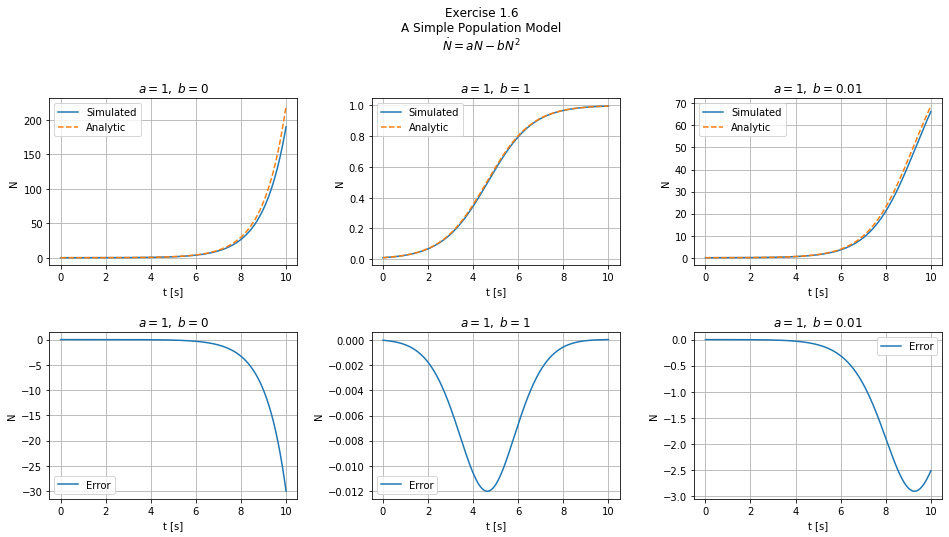

In [81]:
t = np.linspace(0,t_final,round(t_final/0.0001))

data1 = get_data(a1,b1,N01,dt,t_final)
data2 = get_data(a2,b2,N02,dt,t_final)
data3 = get_data(a3,b3,N03,dt,t_final)


t1,N1,dN1 = [np.array(data1[:,s]) for s in range(3)]
t2,N2,dN2 = [np.array(data2[:,s]) for s in range(3)]
t3,N3,dN3 = [np.array(data3[:,s]) for s in range(3)]

# Plotting
###############################################################################
fig, ax = plt.subplots(2,3,figsize=(16,8))
fig.suptitle("Exercise 1.6\nA Simple Population Model\n"+r"$\dot{N}=aN-bN^2$")

ax[0,0].set_title(rf"$a={a1},\,\,b={b1}$")
ax[0,0].plot(t1,N1,linestyle="-",label='Simulated')
ax[0,0].plot(t1,N_a(a1,b1,N01,t1),linestyle="--",label='Analytic')

ax[0,1].set_title(rf"$a={a2},\,\,b={b2}$")
ax[0,1].plot(t2,N2,linestyle="-",label='Simulated')
ax[0,1].plot(t2,N_a(a2,b2,N02,t2),linestyle="--",label='Analytic')

ax[0,2].set_title(rf"$a={a3},\,\,b={b3}$")
ax[0,2].plot(t3,N3,linestyle="-",label='Simulated')
ax[0,2].plot(t3,N_a(a3,b3,N03,t3),linestyle="--",label='Analytic')

ax[1,0].set_title(rf"$a={a1},\,\,b={b1}$")
ax[1,0].plot(t1,N1-N_a(a1,b1,N01,t1),linestyle="-",label='Error')

ax[1,1].set_title(rf"$a={a2},\,\,b={b2}$")
ax[1,1].plot(t2,N2-N_a(a2,b2,N02,t2),linestyle="-",label='Error')

ax[1,2].set_title(rf"$a={a3},\,\,b={b3}$")
ax[1,2].plot(t3,N3-N_a(a3,b3,N03,t3),linestyle="-",label='Error')

for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel("t [s]")
        ax[i,j].set_ylabel(r"N")
        ax[i,j].legend()
        ax[i,j].grid()

plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.82)
plt.show()
###############################################################################

# Chapter 2

## Exercise 1

## Exercise 2

## Exercise 3

## Exercise 4

## Exercise 5

## Exercise 6

## Exercise 7

## Exercise 8

## Exercise 9

## Exercise 10

## Exercise 11

## Exercise 12

## Exercise 13

## Exercise 14

## Exercise 15

## Exercise 16

## Exercise 17

## Exercise 18

## Exercise 19

## Exercise 20

## Exercise 21

## Exercise 22

## Exercise 23

## Exercise 24

## Exercise 25

## Exercise 26

## Exercise 27

# Chapter 3

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

## Exercise 1

# Chapter 4

# Chapter 5

# Chapter 6

# Chapter 7

# Chapter 8

# Chapter 9

# Chapter 10

# Chapter 11

# Chapter 12